In [1]:
!pip install pandas
!pip install tqdm
!pip install pydot


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import sys
sys.path.append("../")

from reclearn.models.matching import MIND
from keras.utils import plot_model

### 构造MIND模型参数

In [3]:
def build_model_params():
    model_params = {
        'item_num': 20,
        'embed_dim': 32,
        'seq_len': 20,
        'num_interest': 5,
        'stop_grad': True,
        'label_attention': True,
        'neg_num': 50,
        'batch_size': 256,
        'embed_reg': 0.0
    }
    
    return model_params

### 初始化MIND模型

In [4]:
model_params = build_model_params()
model = MIND(**model_params)

intern_model = model.intern_model()

2022-09-25 09:36:13.150579: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/hzx/protoc/lib
2022-09-25 09:36:13.150657: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-25 09:36:13.150712: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hzx-KPRC-WX0): /proc/driver/nvidia/version does not exist
2022-09-25 09:36:13.152826: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### 使用summary查看模型结构

In [6]:
intern_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 click_seq (InputLayer)         [(None, 20)]         0           []                               
                                                                                                  
 tf.math.not_equal (TFOpLambda)  (None, 20)          0           ['click_seq[0][0]']              
                                                                                                  
 pos_item (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 tf.cast (TFOpLambda)           (None, 20)           0           ['tf.math.not_equal[0][0]']      
                                                                                              

#### 使用plot_model方法可视化模型

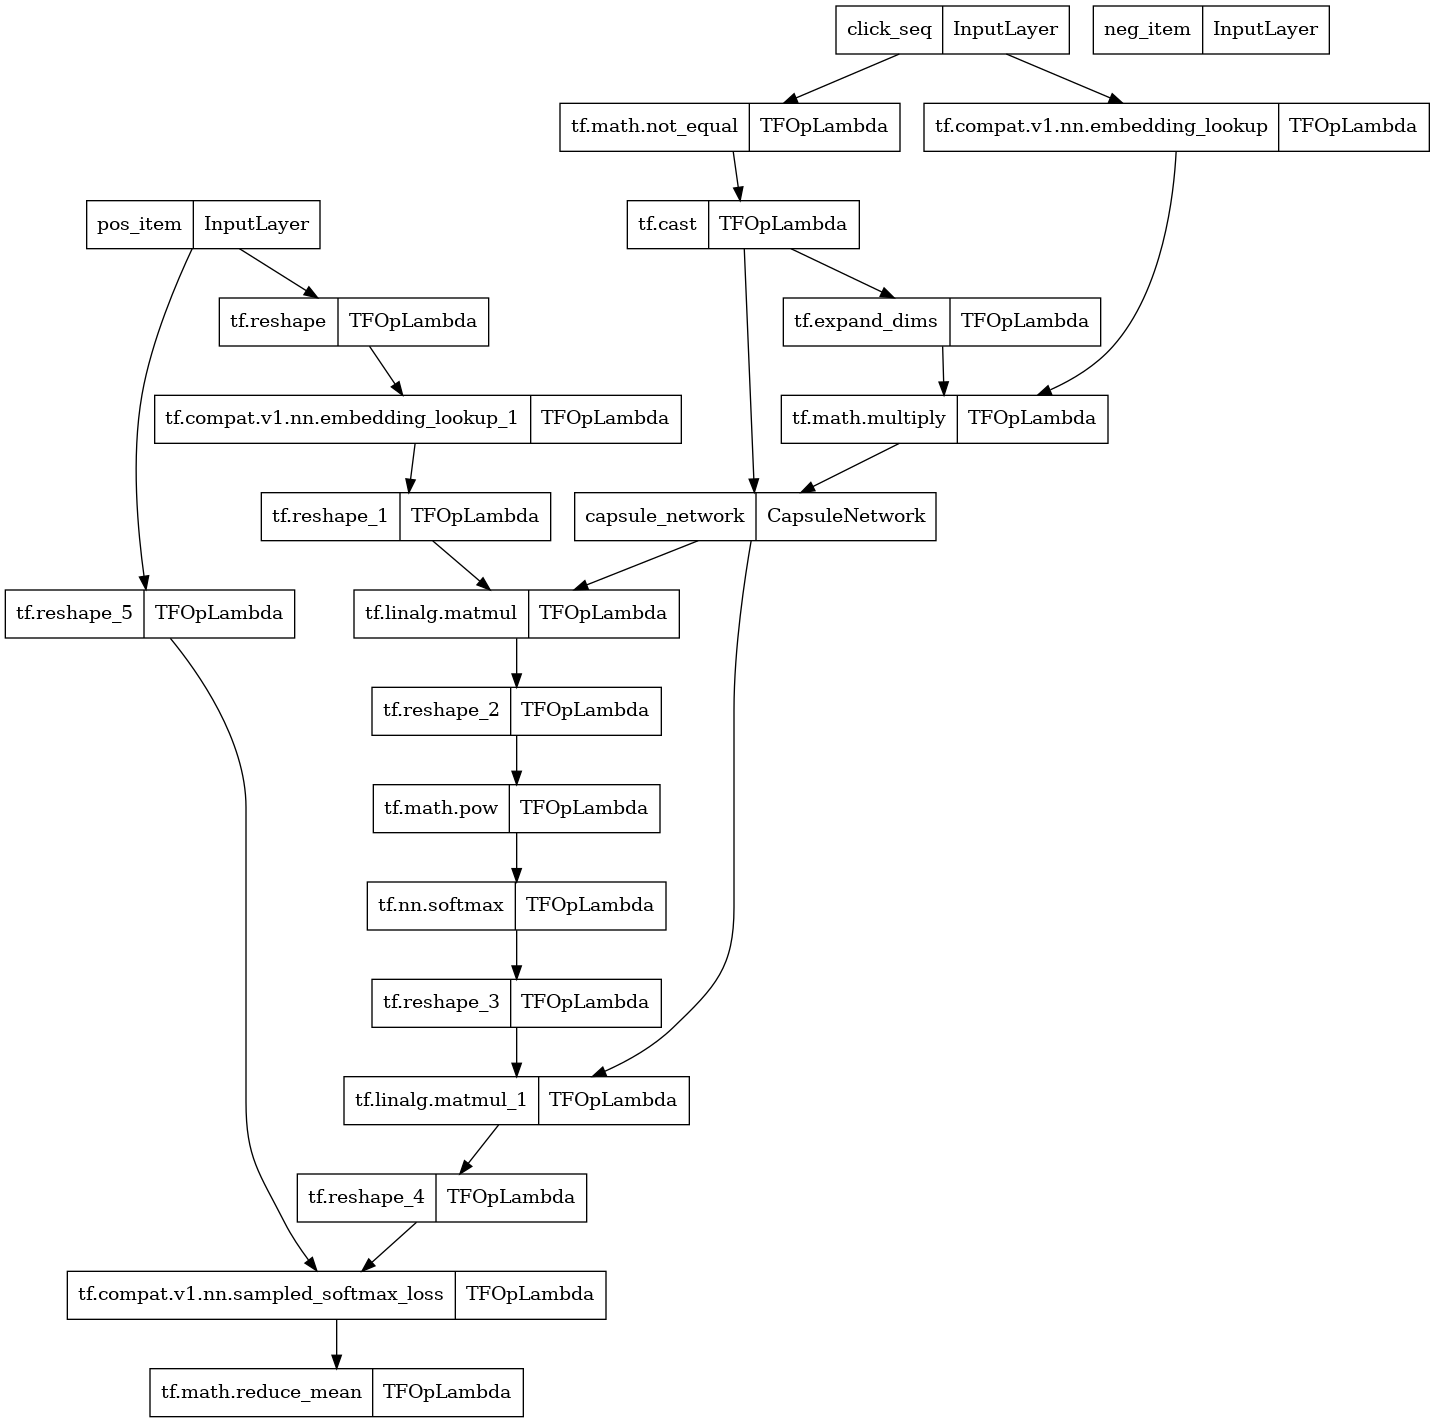

In [5]:
plot_model(intern_model, to_file='mind.png')

#### 保存模型

In [8]:
intern_model.compile()
intern_model.save("./mind_model")

AssertionError: Tried to export a function which references 'untracked' resource Tensor("4691:0", shape=(), dtype=resource). TensorFlow objects (e.g. tf.Variable) captured by functions must be 'tracked' by assigning them to an attribute of a tracked object or assigned to an attribute of the main object directly. See the information below:
	Function name = b'__inference_signature_wrapper_4697'
	Captured Tensor = <ResourceHandle(name="Resource-3-at-0x561f52ef4ea0", device="/job:localhost/replica:0/task:0/device:CPU:0", container="Anonymous", type="tensorflow::Var", dtype and shapes : "[ DType enum: 1, Shape: [20,32] ]")>
	Trackable referencing this tensor = <tf.Variable 'Embedding_layer/item_embedding_table:0' shape=(20, 32) dtype=float32>